In [32]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

(3528.845741176785, -1.4744415300007745)


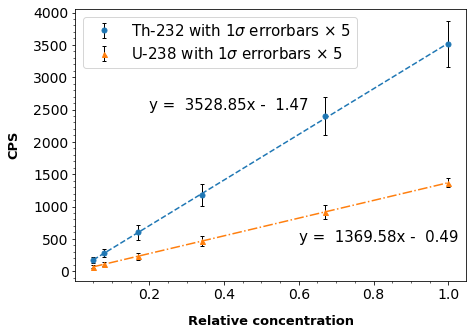

In [89]:
Rela_con = np.array([0.05, 0.08, 0.17, 0.34, 0.67, 1.00])#Relative concentration
Th232_counts = np.array([174, 283, 599, 1181, 2402, 3509])
Th232_err = np.array([10, 12, 22, 35, 59, 71])
U238_counts = np.array([68, 111, 228, 463, 915, 1371])
U238_err = np.array([5, 7, 11, 16, 23, 15])

fig = plt.figure(figsize=(7,5))

plt.errorbar(Rela_con,Th232_counts,yerr=Th232_err*5,fmt='o',ms=5,ecolor='black',elinewidth=1,capsize=2, \
    label=r'Th-232 with 1$\sigma$ errorbars $\times$ 5')
plt.errorbar(Rela_con,U238_counts,yerr=U238_err*5,fmt='^',ms=5,ecolor='black',elinewidth=1,capsize=2, \
    label=r'U-238 with 1$\sigma$ errorbars $\times$ 5')

# fit function
def liner_func(x ,a ,b):
        return a*x +b
Th_popt, Th_pcov = curve_fit(liner_func, Rela_con, Th232_counts,sigma=Th232_err)
U_popt, U_pcov = curve_fit(liner_func, Rela_con, U238_counts,sigma=U238_err)
Th_perr = np.sqrt(np.diag(Th_pcov))
U_perr = np.sqrt(np.diag(U_pcov))
plt.plot(Rela_con, liner_func(Rela_con, *Th_popt), color='#1f77b4',linestyle= '--')
plt.plot(Rela_con, liner_func(Rela_con, *U_popt), color='#ff7f0e', linestyle= 'dashdot')
plt.legend(loc='best',fontsize=15)
print(tuple(Th_popt))
plt.text(0.2,2500,'y =  %5.2fx - %5.2f'%(Th_popt[0],abs(Th_popt[1])),fontsize=15)
plt.text(0.6,450,'y =  %5.2fx - %5.2f'%(U_popt[0],abs(U_popt[1])),fontsize=15)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=14)
font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 13}
plt.xlabel("Relative concentration",font,labelpad=13)
plt.ylabel("CPS",font,labelpad=13)
plt.savefig('./paper_figure2.pdf',bbox_inches='tight')